In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/school-project-dataset/schoolProj.csv


# Metadata
* **NAME:** School Name
* **BUSINESS_STATUS:** Status of Business
* **ADDRESS:** Location of School
* **RATING:** Review on Google Maps
* **COUNT:** Uniqueness of Record
* **LATITUDE:** Latitude Geocode
* **LONGITUDE:** Longitude Geocode
* **SEARCH_TYPE:** Foreign Key to Search Type Table
* **LAST_RUN_DATE:** Last Time Run
* **WEBSITE:** Business website
* **SEARCH_KEYWORD:** Keyword Used for Google Map Search

# **Exploratory Data Analysis**

#  Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
from dateutil.parser import parse
import textwrap
import folium
from math import radians, sin, cos, sqrt, atan2
import os

# Load and Check the Dataset

In [3]:
schoolProj_csv=pd.read_csv("/kaggle/input/school-project-dataset/schoolProj.csv", encoding='utf-8-sig')
schoolProj_csv.head(5)

,ID,NAME,BUSINESS_STATUS,ADDRESS,RATING,COUNT,LATITUDE,LONGITUDE,SEARCH_TYPE_ID,LAST_RUN_DATE,WEBSITE,SEARCH_KEYWORD
0,1,樂獅英語 忠義分校,OPERATIONAL,"No. 76號, Guangrong Rd, Luzhou District, New Ta...",4.9,1,25.088707,121.463470,1,2024/3/1 19:45,https://after-school-program-1547.business.sit...,after school program
1,2,The New School 新派英語,OPERATIONAL,"No. 358, 永吉路 Xinyi District, Taipei City, Taiw...",5.0,1,25.045008,121.577013,1,2024/3/1 19:45,https://line.me/ti/p/Gy-gVrRuLe,after school program
2,3,【贏家文教中心 信義校】信義區|永春站|博愛|雙永|興雅|瑠公|附近國中國小數學|英文理化補...,OPERATIONAL,"No. 10號, Songde Rd, Xinyi District, Taipei Cit...",5.0,1,25.039528,121.577473,1,2024/3/1 19:45,https://www.facebook.com/winners.educenter,after school program
3,4,寰宇教育 敦南校,OPERATIONAL,"106, Taiwan, Taipei City, Da’an District, Sect...",5.0,1,25.038310,121.549807,1,2024/3/1 19:45,http://globalchild.com.tw/,after school program
4,5,葛洛莉英語-南崁校,OPERATIONAL,"No. 16號, Lane 98, Section 1, Nanzhu Rd, Luzhu ...",4.9,1,25.047354,121.290154,1,2024/3/1 19:45,https://www.glo.com.tw/index.html,after school program


# Check Shape of the Dataset

In [4]:
schoolProj_csv.shape

(866, 12)

# Show Columns List

In [5]:
schoolProj_csv.columns

Index(['ID', 'NAME', 'BUSINESS_STATUS', 'ADDRESS', 'RATING', 'COUNT',
       'LATITUDE', 'LONGITUDE', 'SEARCH_TYPE_ID', 'LAST_RUN_DATE', 'WEBSITE',
       'SEARCH_KEYWORD'],
      dtype='object')

# Dataset Information

In [6]:
schoolProj_csv.describe()

,ID,RATING,COUNT,LATITUDE,LONGITUDE,SEARCH_TYPE_ID
count,866.000000,866.000000,866.0,866.000000,866.000000,866.000000
mean,29.243649,4.143649,1.0,25.052754,119.961715,8.281755
std,17.276988,1.269841,0.0,1.391191,17.633718,4.743996
min,1.000000,0.000000,1.0,1.300191,-118.130405,1.000000
25%,14.000000,3.925000,1.0,25.012809,121.448005,4.000000
50%,29.000000,4.600000,1.0,25.041198,121.519375,8.000000
75%,44.000000,4.900000,1.0,25.068440,121.546095,13.000000
max,60.000000,5.000000,1.0,40.755157,121.761416,16.000000


In [7]:
schoolProj_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               866 non-null    int64  
 1   NAME             866 non-null    object 
 2   BUSINESS_STATUS  866 non-null    object 
 3   ADDRESS          866 non-null    object 
 4   RATING           866 non-null    float64
 5   COUNT            866 non-null    int64  
 6   LATITUDE         866 non-null    float64
 7   LONGITUDE        866 non-null    float64
 8   SEARCH_TYPE_ID   866 non-null    int64  
 9   LAST_RUN_DATE    866 non-null    object 
 10  WEBSITE          704 non-null    object 
 11  SEARCH_KEYWORD   866 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 81.3+ KB


In [8]:
schoolProj_csv.isnull().sum()

ID                   0
NAME                 0
BUSINESS_STATUS      0
ADDRESS              0
RATING               0
COUNT                0
LATITUDE             0
LONGITUDE            0
SEARCH_TYPE_ID       0
LAST_RUN_DATE        0
WEBSITE            162
SEARCH_KEYWORD       0
dtype: int64

<Axes: >

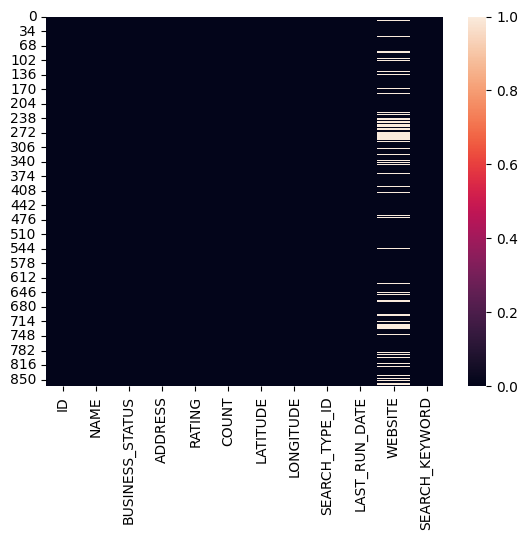

In [9]:
sns.heatmap(schoolProj_csv.isnull())

**Note: there are no null values found**

In [10]:
schoolProj_csv.duplicated().sum()

0

In [11]:
schoolProj_csv["SEARCH_KEYWORD"].unique()

array(['after school program', 'bilingual', 'buxiban', 'cramm', 'daycare',
       'educational', 'education center', 'educational center',
       'elementary', 'experimental', 'high school', 'IB program',
       'international', 'montessori', 'gym', 'religious'], dtype=object)

In [12]:
schoolProj_csv["RATING"].unique()

array([4.9, 5. , 4.8, 4.5, 4.6, 4.4, 4.7, 4.2, 4. , 0. , 4.1, 2.9, 3.6,
       3.8, 3.7, 3.5, 3.2, 2.6, 3.1, 4.3, 3.9, 3.4, 3.3, 3. , 2.7, 1. ,
       2.2, 2.4, 2.8, 2. ])

**All records are unique**

In [13]:
schoolProj_csv["SEARCH_KEYWORD"].value_counts()

SEARCH_KEYWORD
buxiban                 60
daycare                 60
educational             60
education center        60
high school             60
religious               60
after school program    59
educational center      59
elementary              59
international           59
montessori              59
gym                     59
bilingual               58
cramm                   57
IB program              19
experimental            18
Name: count, dtype: int64

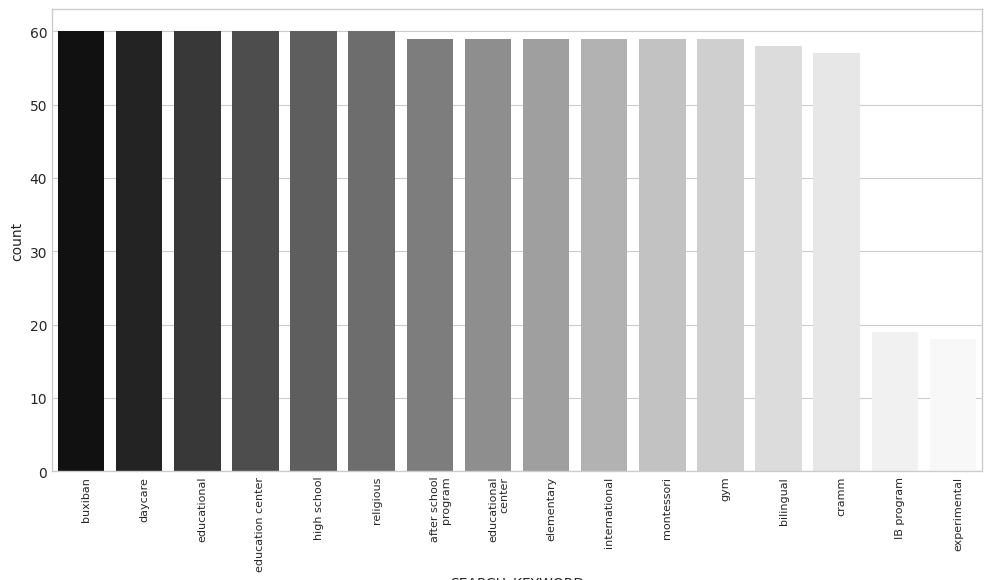

In [14]:
# Set the style to seaborn-whitegrid
plt.style.use('seaborn-whitegrid')

# Define a single color palette with varying shades from light to dark
color_palette = sns.color_palette("Greys_r", len(schoolProj_csv["SEARCH_KEYWORD"].unique()))

# Create the count plot with specified figure size and color palette
plt.figure(figsize=(12, 6))  # Adjust figure size to make the chart wider
ax = sns.countplot(x="SEARCH_KEYWORD", data=schoolProj_csv, palette=color_palette, order=schoolProj_csv['SEARCH_KEYWORD'].value_counts().index)

# Rotate the x-axis labels vertically and wrap them
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8, wrap=True)

# Show the plot
plt.show()


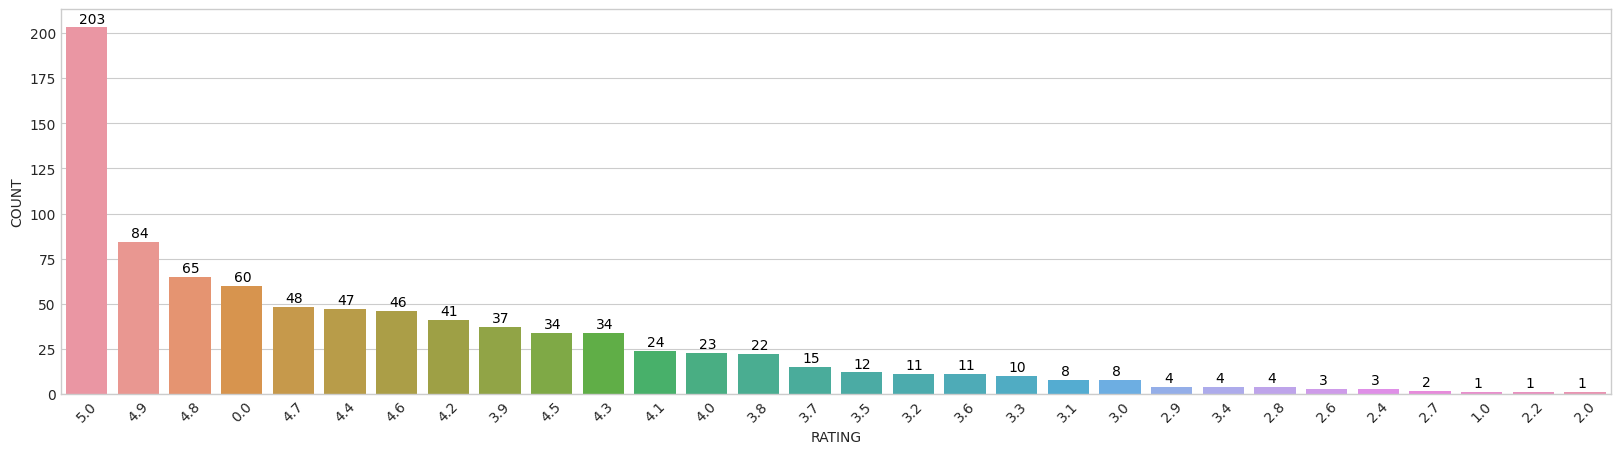

In [15]:
plt.figure(figsize=(20, 5))
plt.style.use('seaborn-whitegrid')

# Get the ratings and their counts
rating_counts = schoolProj_csv['RATING'].value_counts()

# Sort the ratings in descending order of counts
rating_counts_sorted = rating_counts.sort_values(ascending=False)

# Plot the count of each rating
ax = sns.countplot(x='RATING', data=schoolProj_csv, order=rating_counts_sorted.index)

plt.xlabel('RATING')
plt.ylabel('COUNT')
plt.xticks(rotation=45)

# Annotate the count on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')

plt.show()

# Displays for All School Types

In [16]:
# Define the coordinates for TienMu, Taipei, Taiwan
tienmu_location = (25.127603, 121.527758)

# Create a map centered at TienMu, Taipei, Taiwan
mymap = folium.Map(location=tienmu_location, zoom_start=10)

# Add a red marker for TienMu with a popup including a website link
folium.Marker(location=tienmu_location, popup='<a href="https://www.example.com" target="_blank">TienMu Website</a>', icon=folium.Icon(color='red')).add_to(mymap)

# Create a feature group to hold the markers
marker_group = folium.FeatureGroup(name='Markers')

# Add markers for each location in the dataset with popup links to their websites
for index, row in schoolProj_csv.iterrows():
    if row['WEBSITE']:  # Check if website link is not empty
        popup_text = f"<a href='{row['WEBSITE']}' target='_blank'>{row['NAME']}</a> - Rating: {row['RATING']}"
    else:
        popup_text = f"{row['NAME']} - Rating: {row['RATING']}"
    marker = folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=popup_text)
    marker.add_to(marker_group)

# Add the marker group to the map
marker_group.add_to(mymap)

# Add layer control to toggle marker visibility based on rating
folium.LayerControl().add_to(mymap)

# Save the map to an HTML file
mymap.save("my_map_with_website_links.html")

# Display the map
mymap


In [17]:
# Total count of locations in the dataset
total_locations = len(schoolProj_csv)

# Count of locations with website links
locations_with_website = schoolProj_csv['WEBSITE'].notnull().sum()

print("Total locations:", total_locations)
print("Locations with website links:", locations_with_website)


Total locations: 866
Locations with website links: 704


# Displays for All CRAMM Type Schools

**Filter the DataFrame to include only rows where SEARCH_KEYWORD is one of the specified values ('after school program', 'buxiban', 'cramm', 'educational', 'education center') for TienMu location and its RATING .**

In [18]:
# Define the coordinates for TienMu, Taipei, Taiwan
tienmu_location = (25.127603, 121.527758)

# Filter the DataFrame
filtered_df = schoolProj_csv[schoolProj_csv['SEARCH_KEYWORD'].isin(['after school program', 'buxiban', 'cramm', 'educational', 'education center']) & schoolProj_csv['RATING'].notnull()]

# Create a map centered at TienMu, Taipei, Taiwan
mymap = folium.Map(location=tienmu_location, zoom_start=10)

# Add a red marker for TienMu with a popup including a website link
folium.Marker(location=tienmu_location, popup='<a href="https://www.example.com" target="_blank">TienMu Website</a>', icon=folium.Icon(color='red')).add_to(mymap)

# Add markers for each location in the filtered DataFrame with popup links to their websites
for index, row in filtered_df.iterrows():
    if row['WEBSITE']:  # Check if website link is not empty
        popup_text = f"<a href='{row['WEBSITE']}' target='_blank'>{row['NAME']}</a> - Rating: {row['RATING']}"
    else:
        popup_text = f"{row['NAME']} - Rating: {row['RATING']}"
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=popup_text).add_to(mymap)

# Save the map to an HTML file
mymap.save("my_map_filtered_with_website_links.html")

# Display the map
mymap


In [19]:
# Print the total record count after displaying the map
total_records = len(filtered_df)
print("Total records in the filtered DataFrame:", total_records)

Total records in the filtered DataFrame: 296


**Filter the DataFrame to include only locations with a rating of 4.5 and up**

In [20]:
# Define the coordinates for TienMu, Taipei, Taiwan
tienmu_location = (25.127603, 121.527758)

# Filter the DataFrame to include only locations with a rating of 4.5 and up
filtered_df = schoolProj_csv[(schoolProj_csv['SEARCH_KEYWORD'].isin(['after school program', 'buxiban', 'cramm', 'educational', 'education center'])) & 
                             (schoolProj_csv['RATING'].notnull()) &
                             (schoolProj_csv['RATING'] >= 4.5)]

# Create a map centered at TienMu, Taipei, Taiwan
mymap = folium.Map(location=tienmu_location, zoom_start=10)

# Add a red marker for TienMu with a popup including a website link
folium.Marker(location=tienmu_location, popup='<a href="https://www.example.com" target="_blank">TienMu Website</a>', icon=folium.Icon(color='red')).add_to(mymap)

# Add markers for each location in the filtered DataFrame with popup links to their websites
for index, row in filtered_df.iterrows():
    if row['WEBSITE']:  # Check if website link is not empty
        popup_text = f"<a href='{row['WEBSITE']}' target='_blank'>{row['NAME']}</a> - Rating: {row['RATING']}"
    else:
        popup_text = f"{row['NAME']} - Rating: {row['RATING']}"
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=popup_text).add_to(mymap)

# Save the map to an HTML file
mymap.save("my_map_filtered_with_website_links.html")

# Display the map
mymap

In [21]:
print("Total count of records:", len(filtered_df))

Total count of records: 233


**Save result dataset**

In [22]:
# Define the directory path
directory_path = "Users/mei/Python_Projects/cramm_school_research"

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Print the directory contents before saving the file
print(f"Directory contents before saving the file:")
print(os.listdir(directory_path))

# Define the file name
file_name = "cramm_rating45_results.csv"

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv(os.path.join(directory_path, file_name), index=False)

# Print the directory contents after saving the file
print(f"\nDirectory contents after saving the file:")
print(os.listdir(directory_path))

Directory contents before saving the file:
[]

Directory contents after saving the file:
['cramm_rating45_results.csv']


# Check for Montessori Schools

**In the TienMu location and RATING 4.5 and up**

In [23]:
# Define the coordinates for TienMu, Taipei, Taiwan
tienmu_location = (25.127603, 121.527758)

# Filter the DataFrame to include only locations with SEARCH_KEYWORD 'montessori'
filtered_df = schoolProj_csv[(schoolProj_csv['SEARCH_KEYWORD'] == 'montessori') & 
                             (schoolProj_csv['RATING'].notnull()) &
                             (schoolProj_csv['RATING'] >= 4.5)]

# Create a map centered at TienMu, Taipei, Taiwan
mymap = folium.Map(location=tienmu_location, zoom_start=10)

# Add a red marker for TienMu with a popup including a website link
folium.Marker(location=tienmu_location, popup='<a href="https://www.example.com" target="_blank">TienMu Website</a>', icon=folium.Icon(color='red')).add_to(mymap)

# Add markers for each location in the filtered DataFrame with popup links to their websites
for index, row in filtered_df.iterrows():
    if row['WEBSITE']:  # Check if website link is not empty
        popup_text = f"<a href='{row['WEBSITE']}' target='_blank'>{row['NAME']}</a> - Rating: {row['RATING']}"
    else:
        popup_text = f"{row['NAME']} - Rating: {row['RATING']}"
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=popup_text).add_to(mymap)

# Save the map to an HTML file
mymap.save("my_map_filtered_with_website_links.html")

# Display the map
mymap


**Locate schook, 太和蒙特梭利幼兒園 **

In [24]:
# Define the coordinates for TienMu, Taipei, Taiwan
tienmu_location = (25.127603, 121.527758)

# Find the latitude and longitude of '太和蒙特梭利幼兒園'
target_school = schoolProj_csv[schoolProj_csv['NAME'] == '太和蒙特梭利幼兒園'].iloc[0]
target_location = (target_school['LATITUDE'], target_school['LONGITUDE'])

# Filter the DataFrame to include only locations with SEARCH_KEYWORD 'montessori'
filtered_df = schoolProj_csv[(schoolProj_csv['SEARCH_KEYWORD'] == 'montessori') & 
                             (schoolProj_csv['RATING'].notnull()) &
                             (schoolProj_csv['RATING'] >= 4.5)]

# Create a map centered between 太和蒙特梭利幼兒園 and TienMu
center_lat = (target_location[0] + tienmu_location[0]) / 2
center_lon = (target_location[1] + tienmu_location[1]) / 2
mymap = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add a green marker for 太和蒙特梭利幼兒園 with a popup including a website link
folium.Marker(location=target_location, popup=f'<a href="{target_school["WEBSITE"]}" target="_blank">{target_school["NAME"]} Website</a>', icon=folium.Icon(color='green')).add_to(mymap)

# Add a red marker for TienMu with a popup including a website link
folium.Marker(location=tienmu_location, popup='<a href="https://www.example.com" target="_blank">TienMu Website</a>', icon=folium.Icon(color='red')).add_to(mymap)

# Add markers for each location in the filtered DataFrame with popup links to their websites
for index, row in filtered_df.iterrows():
    if row['WEBSITE']:  # Check if website link is not empty
        popup_text = f"<a href='{row['WEBSITE']}' target='_blank'>{row['NAME']}</a> - Rating: {row['RATING']}"
    else:
        popup_text = f"{row['NAME']} - Rating: {row['RATING']}"
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=popup_text).add_to(mymap)

# Save the map to an HTML file
mymap.save("my_map_filtered_with_website_links.html")

# Display the map
mymap
